In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import csv
import sys
sys.path.append('/storage/home/hcoda1/4/ashelby8/Manitoba/pyNab/src/')
import nabPy as Nab
sys.path.append('/storage/home/hcoda1/4/ashelby8/calibration/calibration/')
from FitClass import SnCalibration
from config import conf
import FitFuncs
import pandas as pd
import pylab as py
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pd.set_option("display.max_colwidth", 15)

In [205]:
runs = [1374, 1375, 1376, 1377, 1379, 1381]
        #1383, 1385, 1389]
# runs = [1304]

In [206]:
data = []
for i in range(len(runs)):
    with open('/storage/home/hcoda1/4/ashelby8/output%d.csv'%runs[i]) as f:
        csv.DictReader(f)
        data.append(pd.read_csv(f))

In [207]:
dataAll = pd.concat(data,ignore_index = True)

In [208]:
len(runs)

6

In [209]:
dataAll[dataAll['pixel']==101]

,run,pixel,Bias Voltage,Proton,Proton Energy,Cd109,Sn113,Date Time [UTC],trap rise,trap length,trap decay,ecap,chi2_e,xray,chi2_x,CE,Xray,CE hist,Xray hist
8,1374,101,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 2.8909534...,0.793712,[ 1.6785796...,58.707787,3,5,[ 2 1 1 ...,[710 627 50...
27,1375,101,-320,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 4.0816495...,0.178851,[ 2.4933415...,4.633468,1,5,[0 1 0 1 0 ...,[101 92 5...
46,1376,101,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 9.4706059...,0.140945,[ 3.0791767...,5.094551,1,5,[ 0 0 1 ...,[125 115 8...
65,1377,101,-250,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 2.7778866...,0.155484,[ 1.0005240...,16.022040,1,5,[0 0 0 1 0 ...,[134 129 8...
84,1379,101,-210,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 5.6231005...,0.152592,[ 1.8866939...,3.805745,1,5,[0 0 0 1 0 ...,[134 99 6...
103,1381,101,-180,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 5.0536114...,0.166496,[ 1.6805884...,19.548005,1,5,[ 0 0 0 ...,[146 144 7...


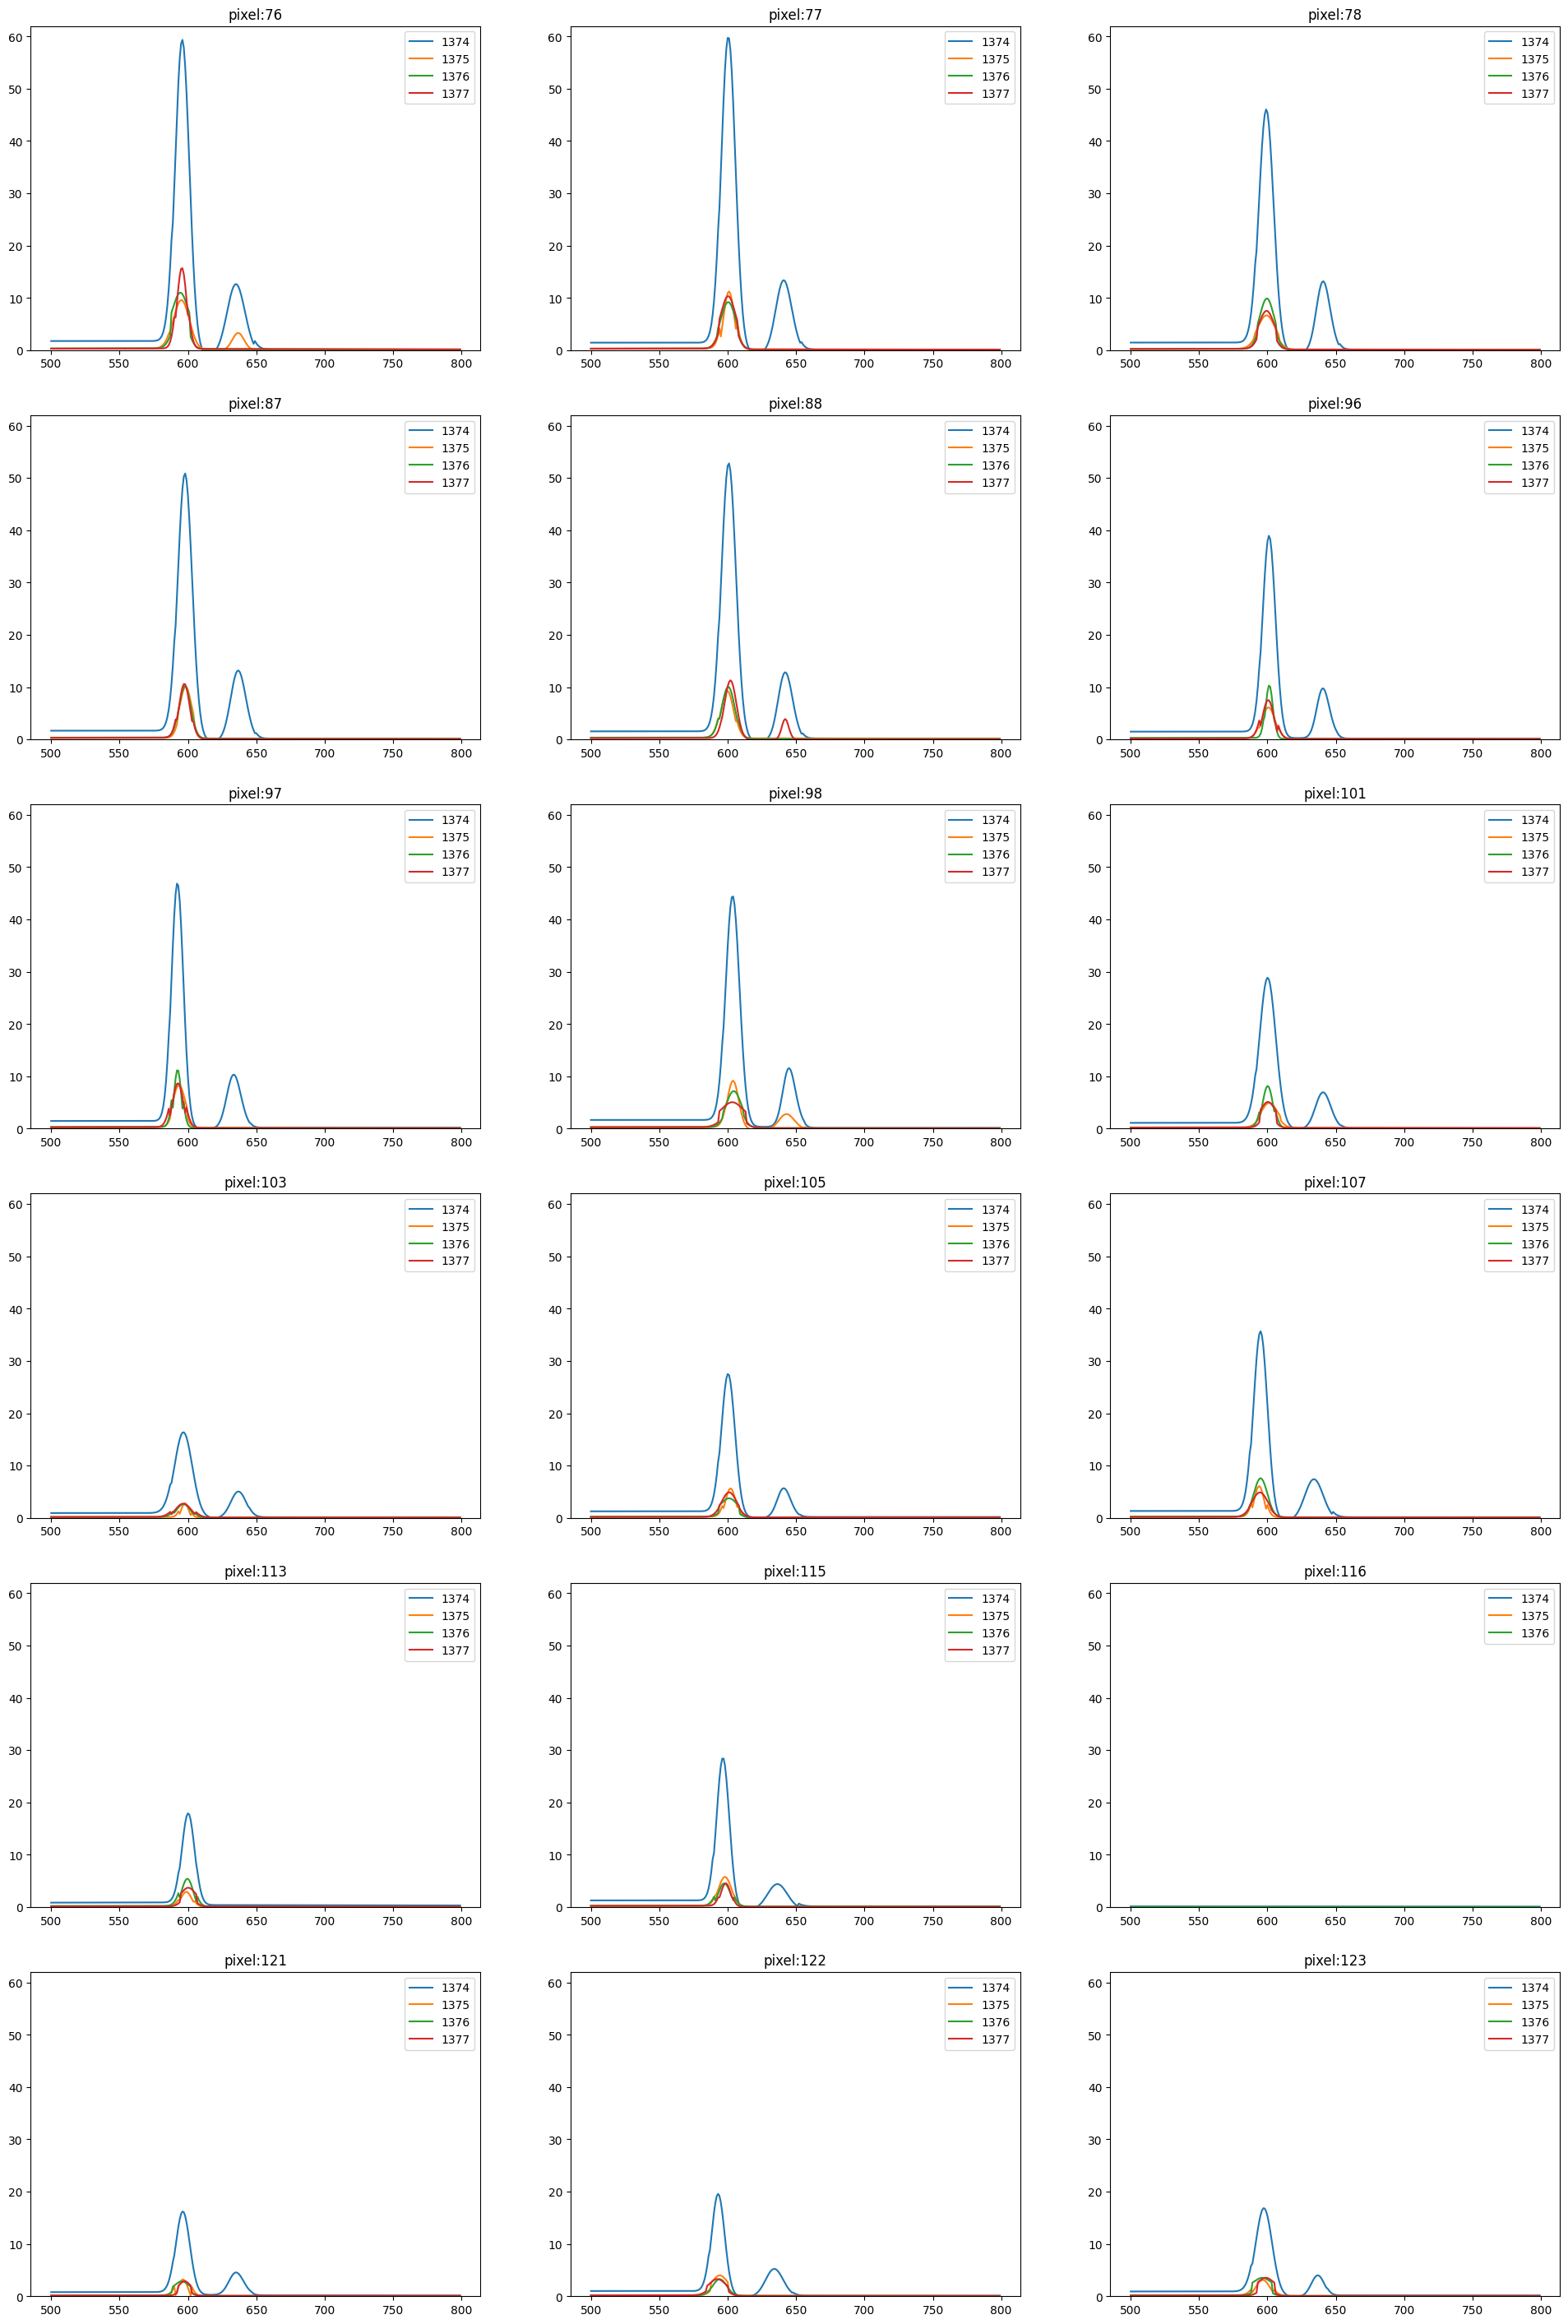

In [210]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))


x = np.arange(500,800)
conf['xray'] = 'OFF'
cnt = 0
for j in np.int16(dataAll[dataAll['run']==1374]['pixel'][:18]):
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j)
    ax.set_ylim(0,62)
    for i in range(4):
        
        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==3:
            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'three'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==2:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'two'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==1:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'one'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()


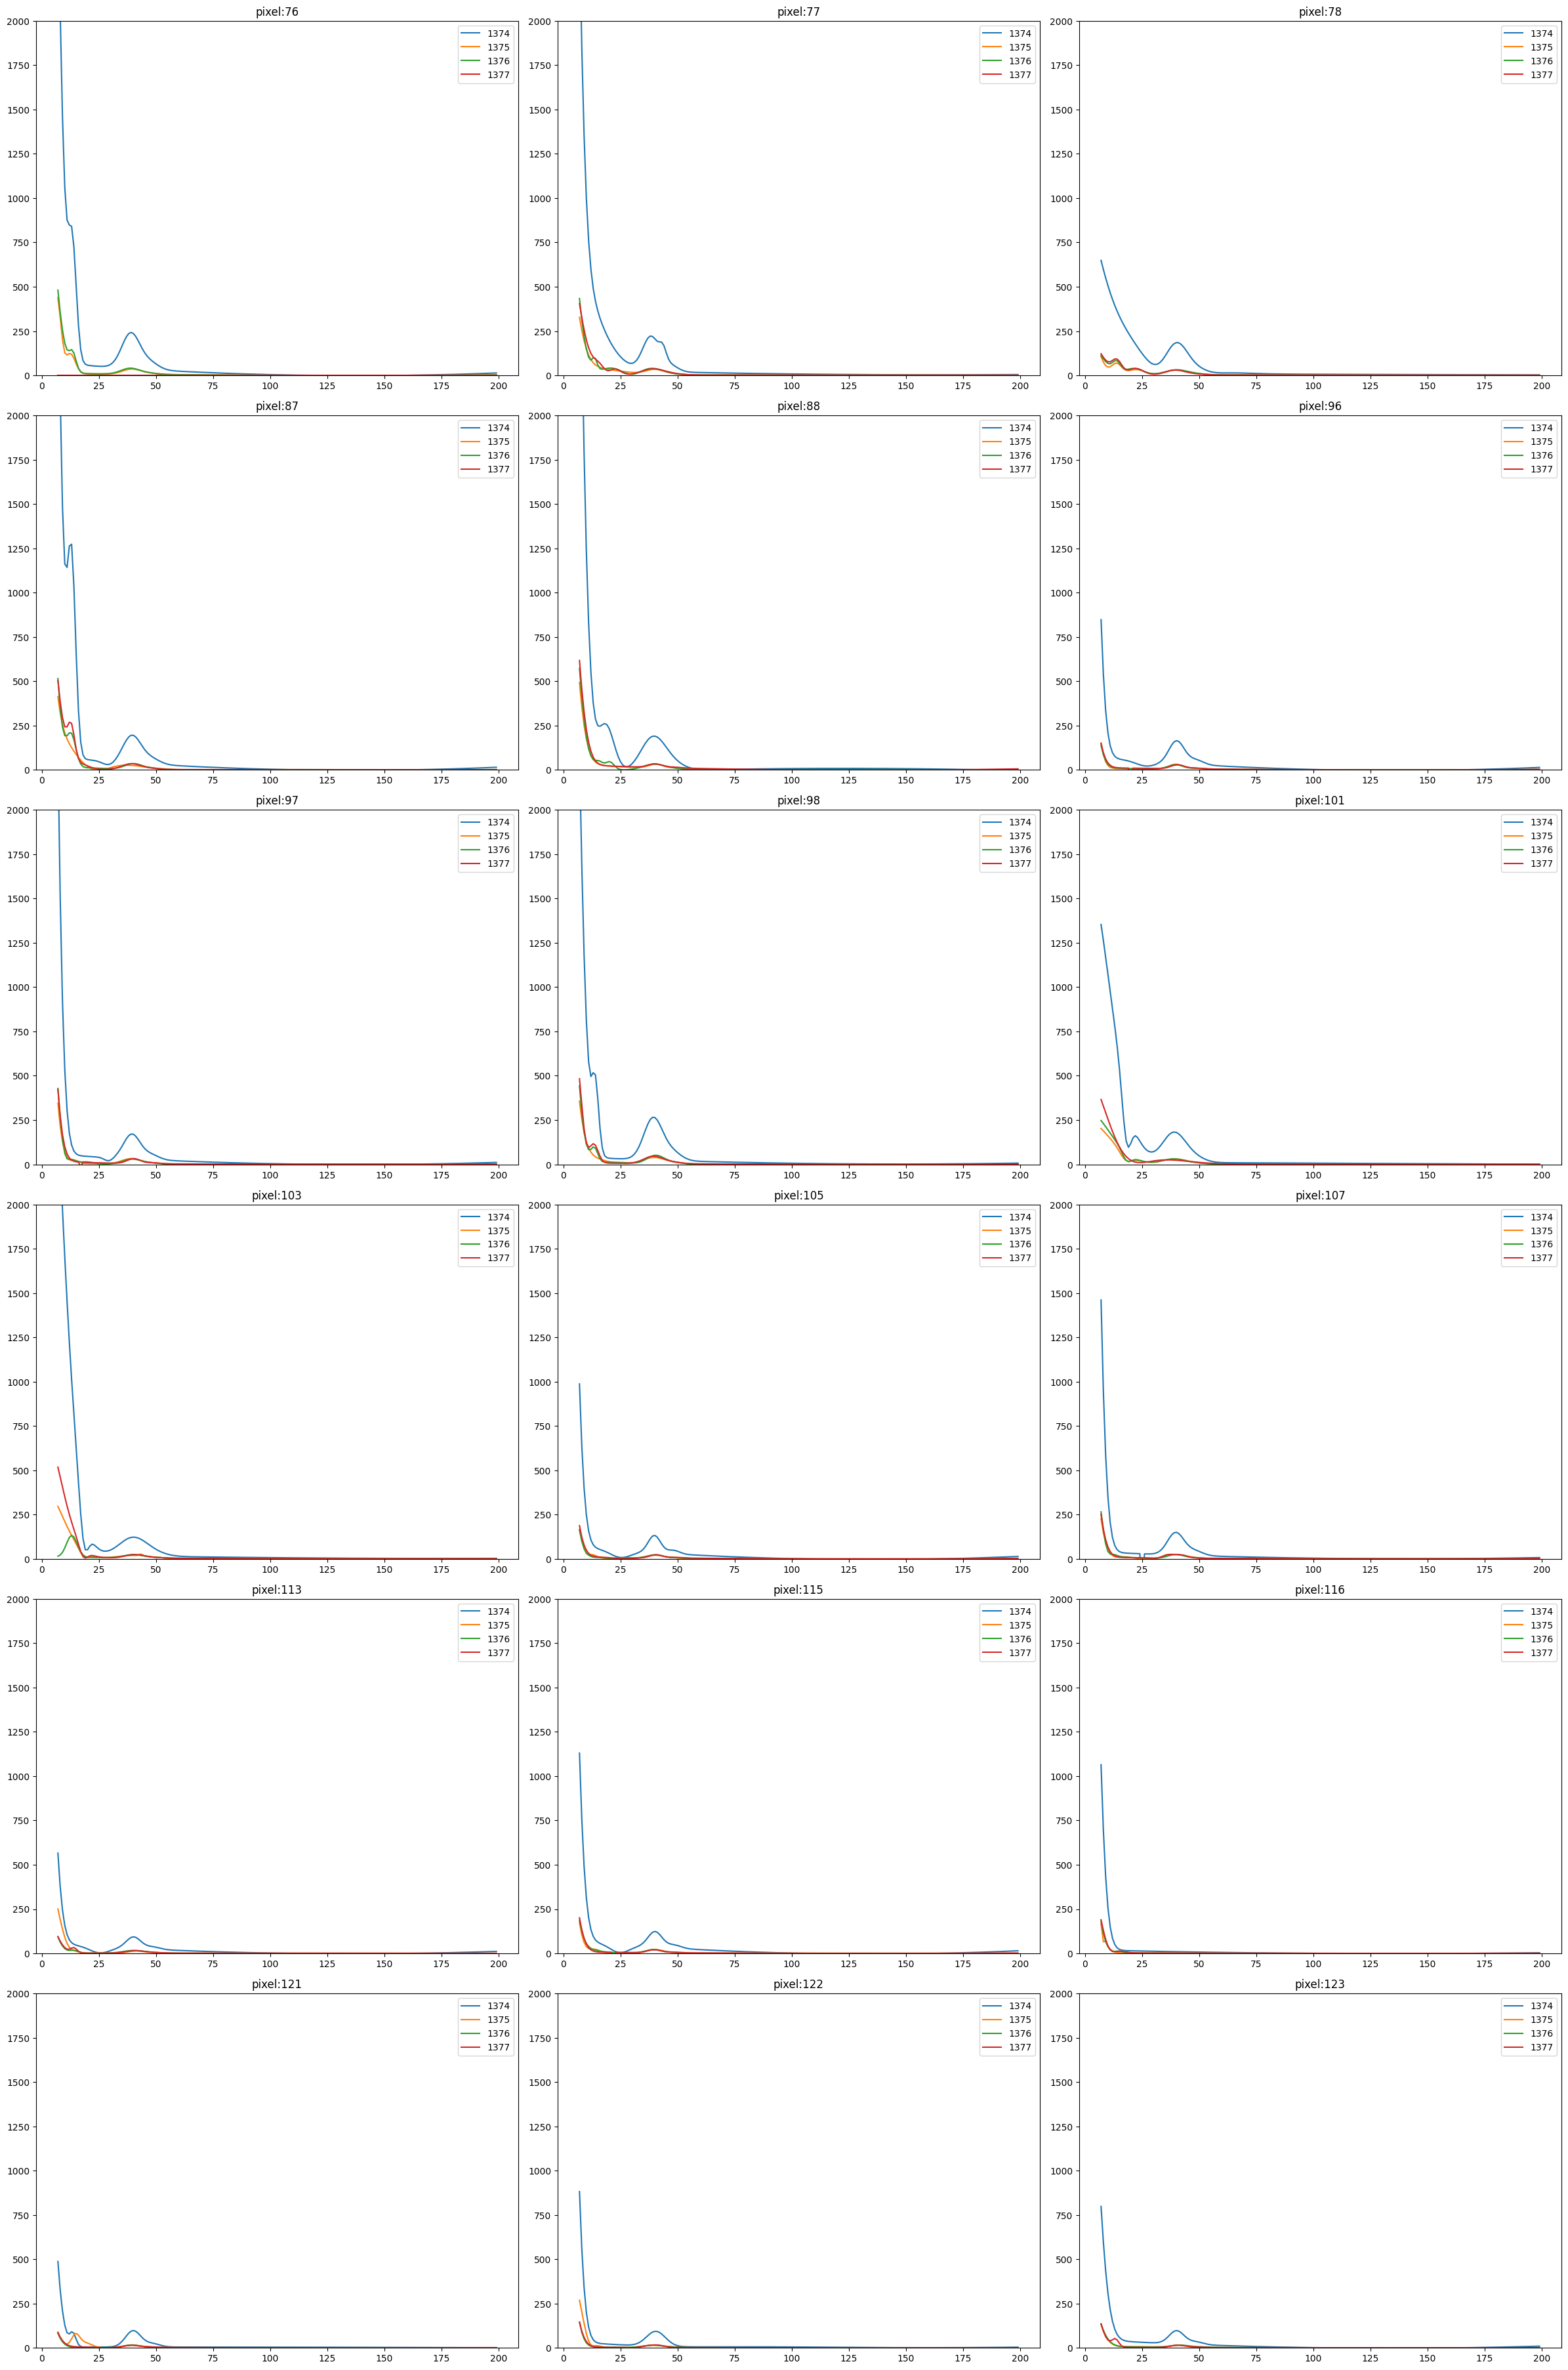

In [211]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))


x = np.arange(7,200)
conf['capture'] = 'OFF'
cnt = 0
for j in np.int16(dataAll[dataAll['run']==1374]['pixel'][:18]):
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j)
    ax.set_ylim(0,2000)
    for i in range(4):
        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==5:

            conf['xray'] = 'five'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==4:

            conf['xray'] = 'four'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==3:

            conf['xray'] = 'three'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)

            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==0:

            conf['xray'] = 'zero'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)

            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

py.tight_layout()

In [168]:
len(np.zeros(195))

195

186


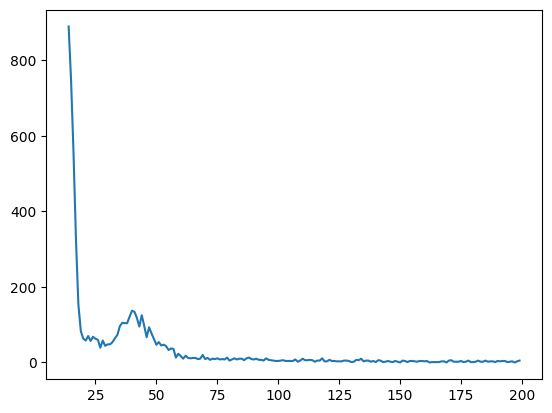

In [204]:
x = np.arange(14,200)
print(len(x))
# for i in range(7):
#     conf['capture'] = 'OFF'
#     conf['capture'] = ''
#     Sn = SnCalibration()
        
        #plot all the fits with the same initilization on the same graph
        
        
        #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
#     plt.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==116].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
plt.plot(x,np.float64(dataAll[dataAll['pixel']==103].iloc[0]['Xray hist'].replace('[','').replace(']','').split()))
# plt.ylim(0,1000)
# plt.xlim(0,30)

In [131]:
#set up coumn naming scheme for the fit parameters
names = []
for i in range(10):
    names.append('p%d'%i)
names_xray = []
for i in range(16):
    names_xray.append('p%d'%i)

In [207]:
#create the parameter data frames
df1 = {}
for i in range(len(names)):
    df1[names[i]] = {}
    for j in range(7):
        par_list = np.float64(dataAll[dataAll['pixel']==98].iloc[j]['ecap'].replace('[','').replace(']','').split()).tolist()
        
        #depending on the fit type used for each pixel, the numer of parameters obtained changes
        #need to add in empty slots for pixels with fewer to be able to construct the dataframe
        if len(par_list) != len(names):
            par_list.extend(['']*(len(names)-len(par_list)))
            
        df1[names[i]][j] = par_list[i]
ecap_data = pd.DataFrame(df1)

# df2 = {}
# for i in range(len(names_xray)):
#     df2[names_xray[i]] = {}
#     for j in range(len(data)):
#         par_list = np.float64(data['xray'][j].replace('[','').replace(']','').split()).tolist()
        
#         if len(par_list) != len(names_xray):
#             par_list.extend(['']*(len(names_xray)-len(par_list)))
            
#         df2[names_xray[i]][j] = par_list[i]
# xray_data = pd.DataFrame(df2)

In [208]:
ecap_data

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,44.177358,603.580753,7.185290,10.295023,644.303197,6.074948,0.354037,1.352264,-0.000076,-0.272008
1,9.347038,603.889305,5.887907,2.646590,642.336689,7.425708,-0.173737,0.51108,-0.000024,0.173892
2,6.084034,604.431758,7.517086,1.114711,-0.945900,0.000168,-0.877918,,,
3,3.667318,603.430606,9.930575,1.502235,-1.297018,0.000129,-1.327262,,,
4,5.102209,604.298355,7.201583,2.408603,-2.373674,0.000381,-1.932013,,,
5,9.566897,604.033985,6.466007,0.242532,-0.079580,0.000309,0.126443,,,
6,5.506018,604.334198,6.165799,2.313492,-2.157035,0.000233,-2.020281,,,


In [209]:
sum((ecap_data['p1']-np.mean(ecap_data['p1']))**2)/len(ecap_data['p1'])

0.12864353753910018

In [210]:
sum((ecap_data['p2']-np.mean(ecap_data['p2']))**2)/len(ecap_data['p2'])

1.5552008693971004

In [214]:
ecap_data['p2']

0    7.185290
1    5.887907
2    7.517086
3    9.930575
4    7.201583
5    6.466007
6    6.165799
Name: p2, dtype: float64

In [213]:
np.mean(ecap_data['p2'])

np.float64(7.193463817142857)

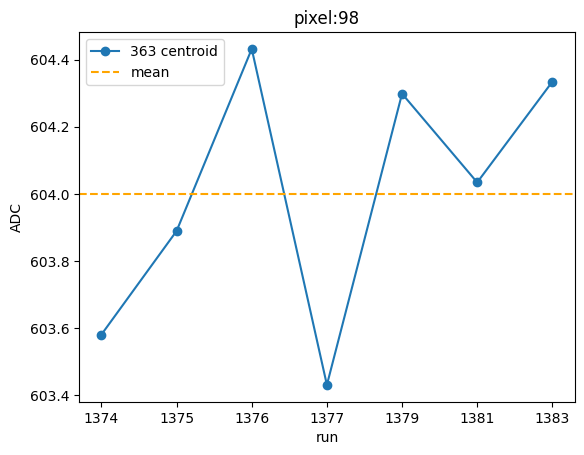

In [212]:
plt.plot(ecap_data['p1'],marker = 'o',label = '363 centroid')
plt.axhline(np.mean(ecap_data['p1']),linestyle = '--',color = 'orange',label = 'mean')
plt.title('pixel:98')

plt.xticks(np.arange(0,7),runs[0:7])
plt.xlabel('run')
plt.ylabel('ADC')
plt.legend()
plt.show()

In [171]:
np.mean(ecap_data['p1'])

np.float64(600.357253)